<a href="https://colab.research.google.com/github/Rishthegod/Simplistic-LSTM-Model-for-Stock-Prediction/blob/main/Simplistic_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed
Epoch 1/10
83/83 [==============================] - 9s 62ms/step - loss: 0.0022
Epoch 2/10
83/83 [==============================] - 6s 77ms/step - loss: 1.1333e-04
Epoch 3/10
83/83 [==============================] - 5s 62ms/step - loss: 1.1470e-04
Epoch 4/10
83/83 [==============================] - 6s 77ms/step - loss: 1.2239e-04
Epoch 5/10
83/83 [==============================] - 5s 62ms/step - loss: 1.0528e-04
Epoch 6/10
83/83 [==============================] - 6s 67ms/step - loss: 1.1548e-04
Epoch 7/10
83/83 [==============================] - 6s 72ms/step - loss: 9.4628e-05
Epoch 8/10
83/83 [==============================] - 5s 62ms/step - loss: 9.3477e-05
Epoch 9/10
83/83 [==============================] - 6s 78ms/step - loss: 9.6135e-05
Epoch 10/10
20/20 [==============================] - 0s 22ms/step


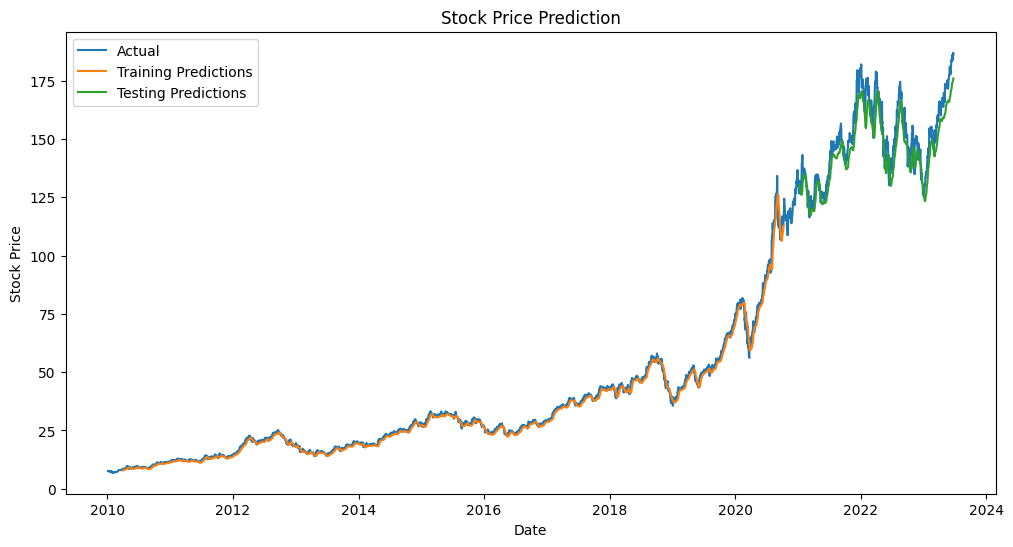

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Define the stock symbol and time frame
symbol = "AAPL"
start_date = "2010-01-01"
end_date = "2023-06-24"

# Download the stock data from Yahoo Finance
data = yf.download(symbol, start=start_date, end=end_date)

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data["Close"].values.reshape(-1, 1))

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Prepare the training data
def create_dataset(data, time_steps=1):
    X, Y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        Y.append(data[i + time_steps, 0])
    return np.array(X), np.array(Y)

time_steps = 60  # Number of previous time steps to use for prediction
X_train, Y_train = create_dataset(train_data, time_steps)
X_test, Y_test = create_dataset(test_data, time_steps)

# Reshape the input data to fit the LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer="adam", loss="mean_squared_error")

# Train the model
model.fit(X_train, Y_train, epochs=50, batch_size=32)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse scale the predictions
train_predictions = scaler.inverse_transform(train_predictions)
Y_train = scaler.inverse_transform([Y_train])
test_predictions = scaler.inverse_transform(test_predictions)
Y_test = scaler.inverse_transform([Y_test])

# Prepare the empty plot arrays
train_data_plot = np.empty_like(data["Close"])
train_data_plot[:] = np.nan
train_data_plot[time_steps:len(train_predictions)+time_steps] = train_predictions[:, 0]

test_data_plot = np.empty_like(data["Close"])
test_data_plot[:] = np.nan
test_data_plot[len(train_predictions)+(time_steps*2):] = test_predictions[:, 0]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data.index, data["Close"], label="Actual")
plt.plot(data.index, train_data_plot, label="Training Predictions")
plt.plot(data.index, test_data_plot, label="Testing Predictions")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price Prediction")
plt.legend()
plt.show()
